In [52]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [53]:
import requests
from bs4 import BeautifulSoup
import lxml
import os
import urllib
import sys
import pandas as pd
import numpy as np
from PIL import Image
import cv2
import csv
import multiprocessing
import matplotlib.pyplot as plt

In [54]:
#Code by Ventakumar R https://www.kaggle.com/venkatkumar001/hfp-2-eda-tensorflow/notebook

import json, codecs

with codecs.open("E:/Atishay/CIS5190_AlexNet_Implementation/metadata/metadata/iwildcam2022_train_annotations.json", 'r',
                 encoding='utf-8', errors='ignore') as f:
    train_meta = json.load(f)
    
with codecs.open("E:/Atishay/CIS5190_AlexNet_Implementation/metadata/metadata/iwildcam2022_test_information.json", 'r',
                 encoding='utf-8', errors='ignore') as f:
    test_meta = json.load(f)

In [55]:
#Code by Ventakumar R https://www.kaggle.com/venkatkumar001/hfp-2-eda-tensorflow/notebook

with codecs.open("E:/Atishay/CIS5190_AlexNet_Implementation/metadata/metadata/gps_locations.json", 'r',
                 encoding='utf-8', errors='ignore') as f:
    gps_meta = json.load(f)
    
with codecs.open("E:/Atishay/CIS5190_AlexNet_Implementation/metadata/metadata/iwildcam2022_mdv4_detections.json", 'r',
                 encoding='utf-8', errors='ignore') as f:
    iwildc_meta = json.load(f)

In [56]:
display(train_meta.keys())

dict_keys(['images', 'annotations', 'categories'])

In [57]:
display(test_meta.keys())

dict_keys(['images'])

In [63]:
wcam4 = pd.DataFrame(test_meta['images'])
#train_cat.columns = [ 'category_id', 'scientificName','family', 'genus']
display(wcam4)

,height,id,seq_id,location,width,datetime,file_name,seq_frame_num,seq_num_frames,sub_location
0,1024,8b31d3be-21bc-11ea-a13a-137349068a90,a91ebc18-0cd3-11eb-bed1-0242ac1c0002,20,1280,2013-06-09 16:01:38.000,8b31d3be-21bc-11ea-a13a-137349068a90.jpg,0,10,NaN
1,1024,8cf202be-21bc-11ea-a13a-137349068a90,a91ebc18-0cd3-11eb-bed1-0242ac1c0002,20,1280,2013-06-09 16:01:39.000,8cf202be-21bc-11ea-a13a-137349068a90.jpg,1,10,NaN
2,1024,8a87e62e-21bc-11ea-a13a-137349068a90,a91ebc18-0cd3-11eb-bed1-0242ac1c0002,20,1280,2013-06-09 16:01:40.000,8a87e62e-21bc-11ea-a13a-137349068a90.jpg,2,10,NaN
3,1024,8e6994f4-21bc-11ea-a13a-137349068a90,a91ebc18-0cd3-11eb-bed1-0242ac1c0002,20,1280,2013-06-09 16:01:41.000,8e6994f4-21bc-11ea-a13a-137349068a90.jpg,3,10,NaN
4,1024,948b29e2-21bc-11ea-a13a-137349068a90,a91ebc18-0cd3-11eb-bed1-0242ac1c0002,20,1280,2013-06-09 16:01:42.000,948b29e2-21bc-11ea-a13a-137349068a90.jpg,4,10,NaN
...,...,...,...,...,...,...,...,...,...,...
60024,1024,981aabf0-21bc-11ea-a13a-137349068a90,a91b0b90-0cd3-11eb-bed1-0242ac1c0002,5,1280,2013-04-23 00:38:35.000,981aabf0-21bc-11ea-a13a-137349068a90.jpg,0,5,1.0
60025,1024,971d8466-21bc-11ea-a13a-137349068a90,a91b0b90-0cd3-11eb-bed1-0242ac1c0002,5,1280,2013-04-23 00:38:36.000,971d8466-21bc-11ea-a13a-137349068a90.jpg,1,5,1.0
60026,1024,90f05d20-21bc-11ea-a13a-137349068a90,a91b0b90-0cd3-11eb-bed1-0242ac1c0002,5,1280,2013-04-23 00:38:37.000,90f05d20-21bc-11ea-a13a-137349068a90.jpg,2,5,1.0
60027,1024,903c3ebc-21bc-11ea-a13a-137349068a90,a91b0b90-0cd3-11eb-bed1-0242ac1c0002,5,1280,2013-04-23 00:38:37.000,903c3ebc-21bc-11ea-a13a-137349068a90.jpg,3,5,1.0


In [64]:
#Code by Ventakumar R https://www.kaggle.com/venkatkumar001/hfp-2-eda-tensorflow/notebook

wcam = pd.DataFrame(train_meta['categories'])
#train_cat.columns = [ 'category_id', 'scientificName','family', 'genus']
display(wcam)

,id,name
0,0,empty
1,2,tayassu pecari
2,3,dasyprocta punctata
3,4,cuniculus paca
4,6,puma concolor
...,...,...
200,566,sciurus sp
201,567,ave desconocida
202,568,aramides cajanea
203,570,aramus guarauna


In [65]:
display(iwildc_meta.keys())

dict_keys(['detection_categories', 'info', 'images'])

In [66]:
#Code by Ventakumar R https://www.kaggle.com/venkatkumar001/hfp-2-eda-tensorflow/notebook

wcam1 = pd.DataFrame(train_meta['annotations'])
#train_cat.columns = [ 'category_id', 'scientificName','family', 'genus']
display(wcam1)

,id,image_id,category_id
0,a292dd3c-21bc-11ea-a13a-137349068a90,96b00332-21bc-11ea-a13a-137349068a90,73
1,a0afcfc0-21bc-11ea-a13a-137349068a90,879d74d8-21bc-11ea-a13a-137349068a90,4
2,a306e9c0-21bc-11ea-a13a-137349068a90,9017f7aa-21bc-11ea-a13a-137349068a90,227
3,9eed94c4-21bc-11ea-a13a-137349068a90,90d93c58-21bc-11ea-a13a-137349068a90,250
4,a2a4dd7a-21bc-11ea-a13a-137349068a90,887cd0ec-21bc-11ea-a13a-137349068a90,2
...,...,...,...
201394,9d6654a6-21bc-11ea-a13a-137349068a90,911ef838-21bc-11ea-a13a-137349068a90,372
201395,9b4c9de2-21bc-11ea-a13a-137349068a90,8b7899a2-21bc-11ea-a13a-137349068a90,372
201396,9a379740-21bc-11ea-a13a-137349068a90,958f609c-21bc-11ea-a13a-137349068a90,372
201397,9d0a3c0c-21bc-11ea-a13a-137349068a90,93bd2ede-21bc-11ea-a13a-137349068a90,372


In [67]:
#Code by Ventakumar R https://www.kaggle.com/venkatkumar001/hfp-2-eda-tensorflow/notebook

wcam2 = pd.DataFrame(train_meta['images'])
#train_cat.columns = [ 'category_id', 'scientificName','family', 'genus']
display(wcam2)

,seq_num_frames,location,datetime,id,seq_id,width,height,file_name,sub_location,seq_frame_num
0,6,3,2013-06-05 05:44:19.000,8b02698a-21bc-11ea-a13a-137349068a90,30048d32-7d42-11eb-8fb5-0242ac1c0002,1920,1080,8b02698a-21bc-11ea-a13a-137349068a90.jpg,0.0,0
1,6,3,2013-06-05 05:44:20.000,8e5b81de-21bc-11ea-a13a-137349068a90,30048d32-7d42-11eb-8fb5-0242ac1c0002,1920,1080,8e5b81de-21bc-11ea-a13a-137349068a90.jpg,0.0,1
2,6,3,2013-06-05 05:44:21.000,8c6be0e4-21bc-11ea-a13a-137349068a90,30048d32-7d42-11eb-8fb5-0242ac1c0002,1920,1080,8c6be0e4-21bc-11ea-a13a-137349068a90.jpg,0.0,2
3,6,3,2013-06-05 05:44:22.000,8fdf7998-21bc-11ea-a13a-137349068a90,30048d32-7d42-11eb-8fb5-0242ac1c0002,1920,1080,8fdf7998-21bc-11ea-a13a-137349068a90.jpg,0.0,3
4,6,3,2013-06-05 05:44:23.000,96093c50-21bc-11ea-a13a-137349068a90,30048d32-7d42-11eb-8fb5-0242ac1c0002,1920,1080,96093c50-21bc-11ea-a13a-137349068a90.jpg,0.0,4
...,...,...,...,...,...,...,...,...,...,...
201394,6,165,2013-06-05 13:08:12.000,91421eee-21bc-11ea-a13a-137349068a90,974a375e-21bc-11ea-a13a-137349068a90,2048,1536,91421eee-21bc-11ea-a13a-137349068a90.jpg,NaN,1
201395,6,165,2013-06-05 13:08:19.000,91140194-21bc-11ea-a13a-137349068a90,974a375e-21bc-11ea-a13a-137349068a90,2048,1536,91140194-21bc-11ea-a13a-137349068a90.jpg,NaN,2
201396,6,165,2013-06-05 13:08:42.000,8f1f5f46-21bc-11ea-a13a-137349068a90,974a375e-21bc-11ea-a13a-137349068a90,2048,1536,8f1f5f46-21bc-11ea-a13a-137349068a90.jpg,NaN,3
201397,6,165,2013-06-05 13:08:48.000,974a365a-21bc-11ea-a13a-137349068a90,974a375e-21bc-11ea-a13a-137349068a90,2048,1536,974a365a-21bc-11ea-a13a-137349068a90.jpg,NaN,4


In [68]:
#Code by Ventakumar R https://www.kaggle.com/venkatkumar001/hfp-2-eda-tensorflow/notebook

wcam3 = pd.DataFrame(iwildc_meta['images'])
#train_cat.columns = [ 'category_id', 'scientificName','family', 'genus']
display(wcam3)

,file,max_detection_conf,detections
0,test/87aaf7d4-21bc-11ea-a13a-137349068a90.jpg,0.999,"[{'category': '1', 'conf': 0.999, 'bbox': [0.5..."
1,test/8e1b2332-21bc-11ea-a13a-137349068a90.jpg,0.999,"[{'category': '1', 'conf': 0.999, 'bbox': [0.3..."
2,test/9592359c-21bc-11ea-a13a-137349068a90.jpg,0.000,[]
3,test/91c938f2-21bc-11ea-a13a-137349068a90.jpg,0.998,"[{'category': '1', 'conf': 0.998, 'bbox': [0.4..."
4,test/935cafbe-21bc-11ea-a13a-137349068a90.jpg,0.000,[]
...,...,...,...
261423,train/913ed090-21bc-11ea-a13a-137349068a90.jpg,0.000,[]
261424,train/915dbc6c-21bc-11ea-a13a-137349068a90.jpg,0.999,"[{'category': '1', 'conf': 0.999, 'bbox': [0.0..."
261425,train/90cf2d76-21bc-11ea-a13a-137349068a90.jpg,0.999,"[{'category': '1', 'conf': 0.999, 'bbox': [0.0..."
261426,train/8bfae7f4-21bc-11ea-a13a-137349068a90.jpg,0.000,[]


In [69]:
#Code by Jensen https://www.kaggle.com/code/a03102030/simple-cnn-for-top-10000-data

len(os.listdir('E:/Atishay/CIS5190_AlexNet_Implementation/train/train'))

201399

In [70]:
len(wcam1.id)

201399

In [71]:
import cv2 as cv

img = cv.imread('E:/Atishay/CIS5190_AlexNet_Implementation/train/train/87422d6c-21bc-11ea-a13a-137349068a90.jpg')
print( img.shape )

(1536, 2048, 3)


In [88]:
#Code by Jensen https://www.kaggle.com/code/a03102030/simple-cnn-for-top-10000-data
# Resizing (32,32) -> (224, 224) for VGG16 input

img=[]
filename=wcam1.image_id[:10000]#original is id: 10000
label=wcam1.category_id[:10000]
for file in filename:
    image=cv2.imread("E:/Atishay/CIS5190_AlexNet_Implementation/train/train/"+file+'.jpg')
    res=cv2.resize(image,(224,224))
    img.append(res)
img=np.array(img)

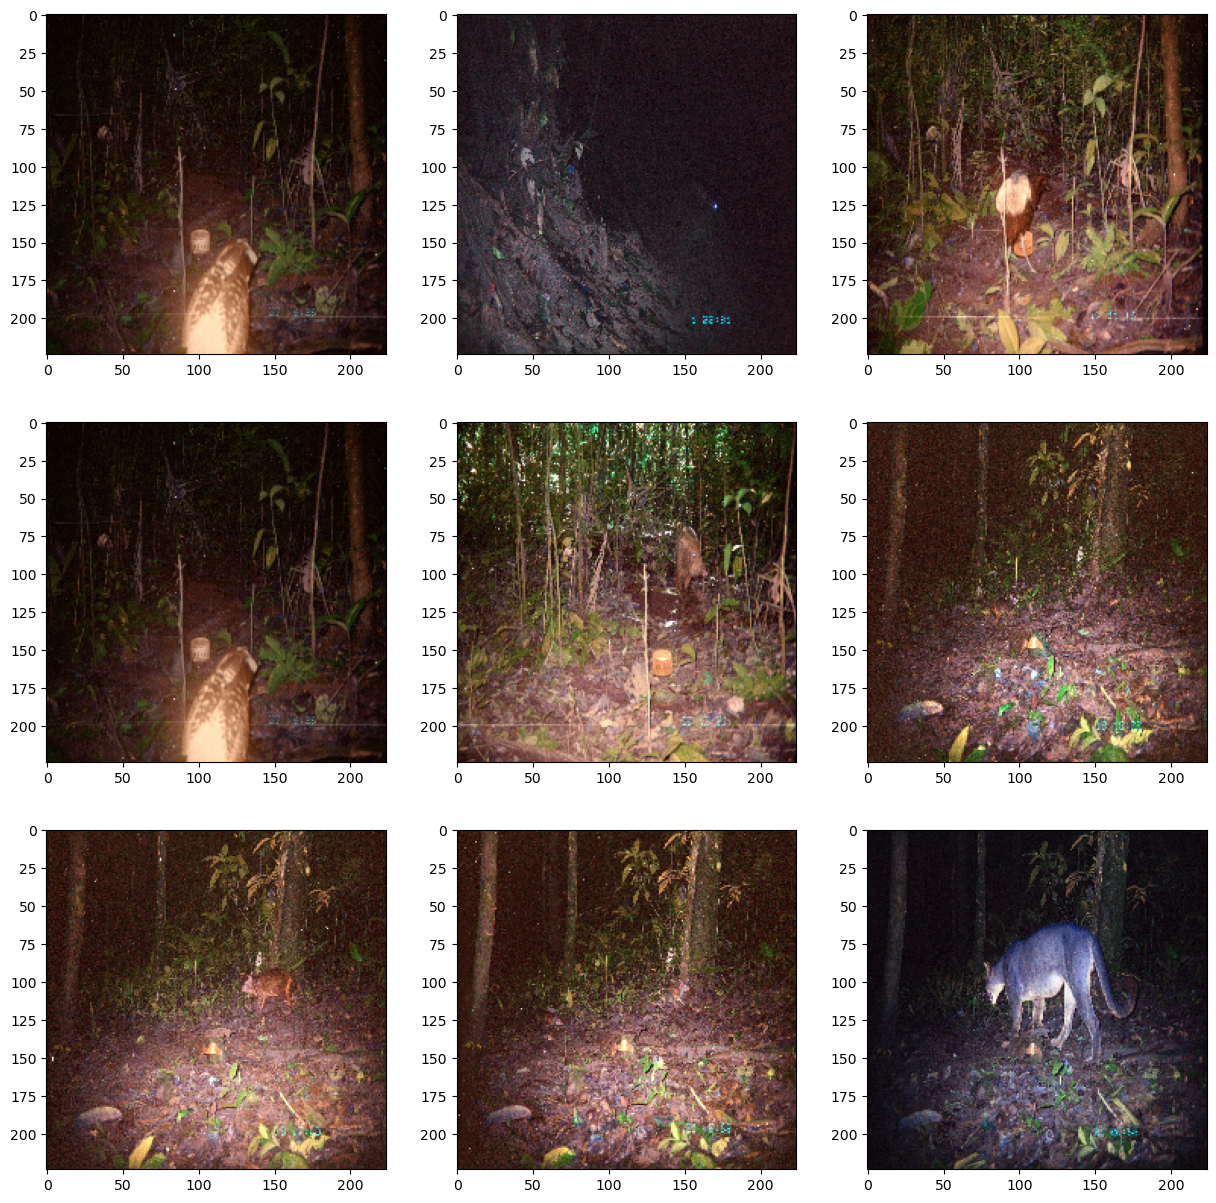

In [89]:
#Code by Jensen https://www.kaggle.com/code/a03102030/simple-cnn-for-top-10000-data

plt.figure(figsize=(15,15))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(img[i])

In [90]:
#Code by Jensen https://www.kaggle.com/code/a03102030/simple-cnn-for-top-10000-data
np.random.seed(921)
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Convolution2D,Dense,MaxPool2D,Activation,Dropout,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1, l2 # L2-Regularization in addition to Dropout
from sklearn.model_selection import train_test_split
#from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization
X_train,X_test,y_train,y_test=train_test_split(img,label,test_size=0.2)
del img
y_train=y_train.astype(int)
y_test=y_test.astype(int)
y_train=np.array(y_train).reshape(-1,1)
y_test=np.array(y_test).reshape(-1,1)
X_train=X_train.reshape(-1,224,224,3)/255 #Normalize
X_test=X_test.reshape(-1,224,224,3)/255
y_train=np_utils.to_categorical(y_train,num_classes=max(label)+1)
y_test=np_utils.to_categorical(y_test,num_classes=max(label)+1)

In [ ]:
# VGG implementation for CIS5190

# Input layer
model=Sequential()

# Conv Layer 1 
model.add(Convolution2D(filters=64,kernel_size=(3,3),strides=(1,1),input_shape=(224,224,3), padding='same'))
model.add(Activation('relu'))

# Conv layer 2
model.add(Convolution2D(filters=64,kernel_size=(3,3),strides=(1,1),input_shape=(224,224,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# Conv layer 3
model.add(Convolution2D(filters=128,kernel_size=(3,3),strides=(1,1),input_shape=(224,224,3), padding='same'))
model.add(Activation('relu'))

# Conv layer 4
model.add(Convolution2D(filters=128,kernel_size=(3,3),strides=(1,1),input_shape=(224,224,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# Conv layer 5
model.add(Convolution2D(filters=256,kernel_size=(3,3),strides=(1,1),input_shape=(224,224,3), padding='same'))
model.add(Activation('relu'))

# Conv layer 6
model.add(Convolution2D(filters=256,kernel_size=(3,3),strides=(1,1),input_shape=(224,224,3), padding='same'))
model.add(Activation('relu'))

# Conv layer 7
model.add(Convolution2D(filters=256,kernel_size=(1,1),strides=(1,1),input_shape=(224,224,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# Conv layer 8
model.add(Convolution2D(filters=512,kernel_size=(3,3),strides=(1,1),input_shape=(224,224,3), padding='same'))
model.add(Activation('relu'))

# Conv layer 9
model.add(Convolution2D(filters=512,kernel_size=(3,3),strides=(1,1),input_shape=(224,224,3), padding='same'))
model.add(Activation('relu'))

# Conv layer 10
model.add(Convolution2D(filters=512,kernel_size=(1,1),strides=(1,1),input_shape=(224,224,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# Conv layer 11
model.add(Convolution2D(filters=512,kernel_size=(3,3),strides=(1,1),input_shape=(224,224,3), padding='same'))
model.add(Activation('relu'))

# Conv layer 12
model.add(Convolution2D(filters=512,kernel_size=(3,3),strides=(1,1),input_shape=(224,224,3), padding='same'))
model.add(Activation('relu'))

# Conv layer 13
model.add(Convolution2D(filters=512,kernel_size=(1,1),strides=(1,1),input_shape=(224,224,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())

model.add(Dense(4096,activation='relu'))
model.add(Dropout(rate=0.50))
          
model.add(Dense(4096,activation='relu'))
model.add(Dropout(rate=0.50))

model.add(Dense(max(label)+1,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

train_history=model.fit(X_train,y_train,validation_split=0.2,epochs=20,batch_size=128,verbose=1)
accuracy=model.evaluate(X_test,y_test,verbose=1)
print("test accuracy:",accuracy[1])#accuracy for test set
model.summary()

Epoch 1/20
 2/50 [>.............................] - ETA: 47:12 - loss: 5.1146 - accuracy: 0.1758    

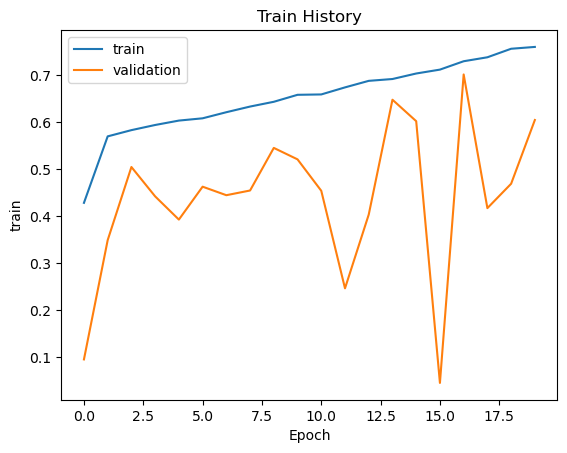

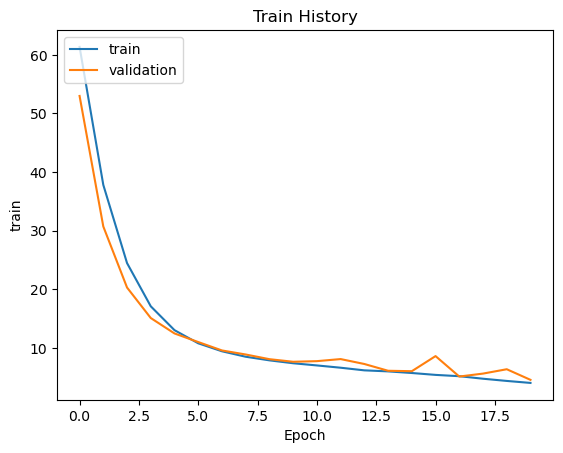

In [86]:
#Code by Jensen https://www.kaggle.com/code/a03102030/simple-cnn-for-top-10000-data

def show_train_history(train_history,train,validation):
        plt.plot(train_history.history[train])
        plt.plot(train_history.history[validation])
        plt.title('Train History')
        plt.ylabel('train')
        plt.xlabel('Epoch')
        plt.legend(['train','validation'],loc='upper left')
        plt.show()

show_train_history(train_history,'accuracy','val_accuracy') #acc:accuracy for training set. val_acc:accuracy for validation.
show_train_history(train_history, 'loss', 'val_loss')

In [87]:
#Code by Jensen https://www.kaggle.com/code/a03102030/simple-cnn-for-top-10000-data

prediction=model.predict(X_test)#original update to predict
print(prediction[0:10])

63/63 [==============================] - 23s 363ms/step
[[2.04148600e-04 9.07024944e-09 5.02832753e-09 ... 3.70643821e-10
  2.24840928e-08 5.17219689e-08]
 [1.14634051e-03 7.68289226e-07 2.00366500e-07 ... 2.20325926e-08
  6.39630741e-07 5.19290870e-06]
 [2.12952797e-03 1.21538501e-10 4.83479749e-12 ... 4.49392368e-13
  4.11474604e-11 9.35936995e-10]
 ...
 [3.96362552e-08 1.49263625e-18 1.26998574e-20 ... 1.99760016e-22
  2.37979888e-19 7.58867320e-20]
 [3.19042010e-04 8.96570000e-08 1.99127292e-08 ... 1.50268120e-09
  1.00690599e-07 2.36425450e-07]
 [5.44777624e-02 4.71047230e-07 2.67103871e-07 ... 1.26457024e-07
  1.35445319e-07 3.16760852e-03]]


In [63]:
img2 = cv.imread('E:/Atishay/CIS5190_AlexNet_Implementation/test/test/94cf8632-21bc-11ea-a13a-137349068a90.jpg')
print( img2.shape )

(1024, 1280, 3)


In [50]:
#Code by Jensen https://www.kaggle.com/code/a03102030/simple-cnn-for-top-10000-data

img_test=[]
filename_test=wcam4.id[:1000]
for file in filename_test:
    image=cv2.imread("E:/Atishay/CIS5190_AlexNet_Implementation/test/test/"+file+'.jpg')
    res=cv2.resize(image,(227,227))
    img_test.append(res)
img_test=np.array(img_test)

In [51]:
#Code by Jensen https://www.kaggle.com/code/a03102030/simple-cnn-for-top-10000-data

prediction=model.predict(img_test)
print(prediction[0:10])

32/32 [==============================] - 13s 388ms/step
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [56]:
#Code by Jensen https://www.kaggle.com/code/a03102030/simple-cnn-for-top-10000-data

submit=pd.DataFrame({'Id':filename_test,'Predicted':prediction})
submit.to_csv('submission.csv',index=False)

ValueError: Per-column arrays must each be 1-dimensional